In [1]:
import sys
sys.path.append("..//")

from AQUA_general import AQUA
from batchAQUA_general import batchAQUA
from stimulus import *
from plotting_functions import *

#from AQUAmeetBrian import AQUAMeetBrian


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from brian2 import *

100%|██████████| 49999/49999 [00:06<00:00, 7896.95it/s]


<class 'numpy.float64'>
<class 'numpy.float64'>
[ True False False False False False False False False False False False
 False False False False False False False False]
[0.00000000e+00 1.75000281e-09 3.49266571e-09 5.22803134e-09
 6.95612812e-09 8.67699157e-09 1.03906501e-08 1.20971464e-08
 1.37965088e-08 1.54887658e-08 1.71739529e-08 1.88521057e-08
 2.05232595e-08 2.21874430e-08 2.38446844e-08 2.54950194e-08
 2.71384764e-08 2.87750908e-08 3.04048982e-08 3.20279199e-08]
batchAQUA spikes
[ 48.19  86.51 149.92 196.94 253.43 303.66 357.77 409.34 462.57]
Brian spikes
[ 48.18  86.55 149.94 197.05 253.49 303.83 357.94 409.58 462.82] ms


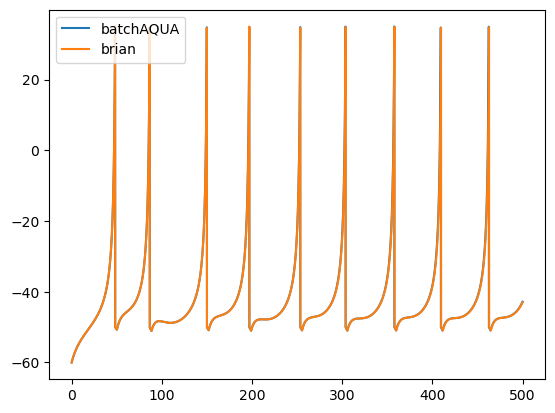

In [2]:
start_scope()

N_neurons = 10

RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
     'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.2, 'f': 150., 'tau': 2.0}    # Class 1

T = 500     # ms
dt = 0.01    # ms
N_iter = int(T/dt)

params = []
x_start = np.zeros((N_neurons, 3))
t_start = np.zeros(N_neurons)
I_inj = 100.*np.ones((N_neurons, N_iter))
for i in range(N_neurons):
    params.append(RS)
    x_start[i] = np.array([-60., 0., 0.])

param_df = pd.DataFrame(params)

batch = batchAQUA(param_df)
batch.Initialise(x_start, t_start)


G, autapses = batch.meetBrian()
G.I = I_inj[:, 0]
# simulation timestep
defaultclock.dt = dt*ms
M_v = StateMonitor(G, 'v', record = 0)
spikemon = SpikeMonitor(G, record = True)
net = Network(G, autapses, M_v, spikemon)
plt.show()

# Run both simulations
net.run(T*ms)

X, time, spikes = batch.update_batch(dt, N_iter, I_inj)

plt.plot(time, X[0, 0], label = 'batchAQUA')
plt.plot(M_v.t/ms, M_v.v[0], label = "brian")
plt.legend()


print(type(X[0, 0, 0]))
print(type(M_v.v[0][0]))

print(X[0, 0, :20] == M_v.v[0][:20])
print(X[0, 0, :20] - M_v.v[0][:20])

print("batchAQUA spikes")
print(spikes[0])

print("Brian spikes")
print(spikemon.t[:].reshape((N_neurons, -1), order = 'F')[0])